# Pràctica 7: Clustering

#### NOM:
#### NIU: 

## Introducció

És difícil de valorar si el clustering és "correcte" o si existeix un patró subjacent a les dades que permeti objectivament decidir el grau de certesa de l'agrupació. Pot ser útil per analizar, agrupar i treure informació de com són les dades, però la qualitat de la partició dependrá de l'aplicació i del analista.

S'acostuma a aplicar a dades de forma no supervisada, és a dir, quan no es tenen etiquetes anotades. En aquest cas, no es rep cap feeback d'error o de recompensa en el cas de fer-ho bé. L'aprenentatge no supervisat conté aquells algoritmes que aprenen sense exemple etiquetats, utilitzant les caracteristiques de les entreades per categoritzar of extreure informació segons algún tipus de criteri **geometric** o **estadistic**.

Els diferents tipus de problemes no supervisats, podriem veure'ls a continuació (no són els únics):

+ *Clustering:* dividir els exemples en diferents agrupacions.
+ *Dimensionality reduction:* reduir els atributs/caracteristiques de les dades (principal component analysis, independent component analysis, non-negative matrix factorization.)
+ *Outlier detection:* trobar events inusuals (per exemple, errors, mals funcionaments..).
+ *Novelty detection:* trobar canvis en les dades.

Un dels més utilitzats és el clustering.



## Clustering

El que volem fer és particionar els exemples no etiquetats en conjunts de clusters, de tal manera que:
- Els exemples dins d'un cluster siguin similars (*alta intra-class* similitut)
- Els exemples de diferents clusters siguin diferents (*baixa inter-class* similitut)

Possibles preguntes que ens agradaria poder respondre sobre el clustering.

+ What is a *natural grouping* among these samples? 
    + Definition of "groupness"
    + Definition of "similarity/distance"

+ *How to group* samples?

+ *How many* clusters?
    + Fixed a priori?
    + Completely data driven?
    + Avoid “trivial” clusters - too large or small...
    + Which methods do work when the number of samples is huge?
    + Which methods do work when the number of classes is huge?, etc.

+ *What* is a *good grouping*? 
    + What objective measures can be defined to evaluate the quality of the clusters?

+ In which space to *group*? 
    + What to do in high-dimensional feature spaces?



## Datasets

#### A. Toy Data

Farem ús de diferents generadors d'exemples, per tal de veure els resultats dels diferents algorismes:
- sklearn.datasets.make_blobs
- sklearn.datasets.make_moons
- sklearn.datasets.make_circles


#### B. Fashion MNIST
Us podeu *descarregar* la Fashion MNIST (si es que no la teniu) del link de [Kaggle](https://www.kaggle.com/zalando-research/fashionmnist?select=fashion-mnist_train.csv). Son uns 150MB una vegada descomprimits.

#### C. Color Quantization Image

Podeu escollir 2 imatges que volgueu vosaltres.


## A. Toy Data

#### Preguntes

1. Crea els teus datasets de joguina. En total en tindreu 4 d'independents, que fareu servir a la resta del apartat. Creeu entre 2-7 clusters per la distribució de blobs, modifiqueu el noise. Feu ús de les següents funcions:
 - [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)
 - [sklearn.datasets.make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons)
 - [sklearn.datasets.make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html#sklearn.datasets.make_circles)
 - un dataset on hi hagi dades aleatoriament per tot l'espai
 
 **Mostreu** els 4 datasets de joguina creats en una mateixa figura fent servir subplots.


2. Feu una comparativa dels resultats obtinguts amb diferents clusteritzadors. Com està explicat a teoria, n'hi ha de molts tipus:

  <img src="https://static-01.hindawi.com/articles/jat/volume-2019/1628417/figures/1628417.fig.001.svgz" width="600">

  Feu proves sobre els 4 datasets anteriors amb els [següents metodes](https://scikit-learn.org/stable/modules/clustering.html):
 - [K-means](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)
 - [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html#sklearn.cluster.MeanShift)
 - [SpectralClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html)
 - [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) (single, complete, Ward i average linkage)
 - [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN)
 
  Intenteu optimitzar una bona visualització per cada una amb els parametres utilitzats. L'objectiu es mostrar els resultats en una mateixa gràfica, com en aquest [exemple](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html). Mostreu exemples que demostrin que enteneu què fan els parametres dels diferents algoritmes.


3. Utilitza els seguents mètodes per intentar seleccionar el número de clusters òptims per a k-means
 - [Silhouette analysis](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) [(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html)
 - [Elbow Method](https://towardsdatascience.com/clustering-metrics-better-than-the-elbow-method-6926e1f723a6)
[(o una altra visualització)](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)




#### Respostes

# 1.

(1000, 2)


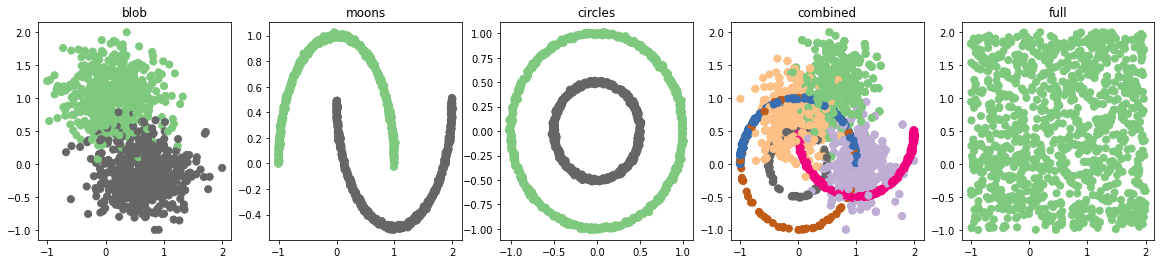

In [1]:
import numpy as np
import sklearn.datasets
import matplotlib.pyplot as plt

def get_toy_data(tipus_dades, n=1000, noise=0.01, rs=0):
    if tipus_dades == "blob":
        X, y = sklearn.datasets.make_blobs(n_samples=n, centers=2, n_features=2, random_state=rs)
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
    elif tipus_dades == "moons":
        X, y = sklearn.datasets.make_moons(n_samples=n, shuffle=True, noise=noise, random_state=rs)
    elif tipus_dades == "circles":
        X, y = sklearn.datasets.make_circles(n_samples=n, shuffle=True, noise=noise, random_state=rs, factor=0.5)
    elif tipus_dades == "combined":
        X, y = sklearn.datasets.make_blobs(n_samples=n, centers=3, n_features=2, random_state=rs)
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
        Xt, yt = sklearn.datasets.make_moons(n_samples=n, shuffle=True, noise=noise, random_state=rs)
        X = np.vstack([X, Xt])
        y = np.hstack([y, yt+len(np.unique(y))])
        Xt, yt = sklearn.datasets.make_circles(n_samples=n, shuffle=True, noise=noise, random_state=rs, factor=0.5)
        X = np.vstack([X, Xt])
        y = np.hstack([y, yt+len(np.unique(y))])
        permutation = np.random.permutation(X.shape[0])
        y[permutation] = y
        X[permutation, :] = X

    elif tipus_dades == "full":
        rng = np.random.RandomState(rs)
        X = rng.rand(n, 2)
        y = np.ones((X.shape[0]))*-1
        X = sklearn.preprocessing.MinMaxScaler((-1, 2)).fit_transform(X)
    else:
        raise "Toy data not recognized"

    return X, y
    
def plot_toy_data(X, y, Xtest=None, ytest=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='Accent')
    lim = plt.axis()
    if Xtest is not None:
        plt.scatter(Xtest[:, 0], Xtest[:, 1], c=ytest, s=20, cmap='Accent', alpha=0.3)
        plt.axis(lim)


datasets = ['blob', 'moons','circles', 'combined', 'full']

plt.figure(figsize=(20,4))
i=0
for d in datasets:
    i+=1
    plt.subplot(1, len(datasets), i)
    plt.title("{}".format(d))
    X,y = get_toy_data(d)
    plot_toy_data(X, y)

        
print(X.shape)


# 2.

In [2]:
def experiment(dataset_name, model):
    print("Running experiment: {} {}".format(dataset_name, model))
    X, y = get_toy_data(dataset_name)

    if X is None or y is None:
        return -1

    model.fit(X, y)
    
    plot_toy_data(X, model.labels_)


Running experiment: blob KMeans(n_clusters=3)
Running experiment: blob MeanShift(max_iter=10)
Running experiment: blob SpectralClustering()
Running experiment: blob AgglomerativeClustering()
Running experiment: blob Birch()
Running experiment: blob DBSCAN()
Running experiment: moons KMeans(n_clusters=3)
Running experiment: moons MeanShift(max_iter=10)
Running experiment: moons SpectralClustering()
Running experiment: moons AgglomerativeClustering()
Running experiment: moons Birch()
Running experiment: moons DBSCAN()
Running experiment: circles KMeans(n_clusters=3)
Running experiment: circles MeanShift(max_iter=10)
Running experiment: circles SpectralClustering()
Running experiment: circles AgglomerativeClustering()
Running experiment: circles Birch()
Running experiment: circles DBSCAN()
Running experiment: combined KMeans(n_clusters=3)
Running experiment: combined MeanShift(max_iter=10)
Running experiment: combined SpectralClustering()
Running experiment: combined AgglomerativeClusteri

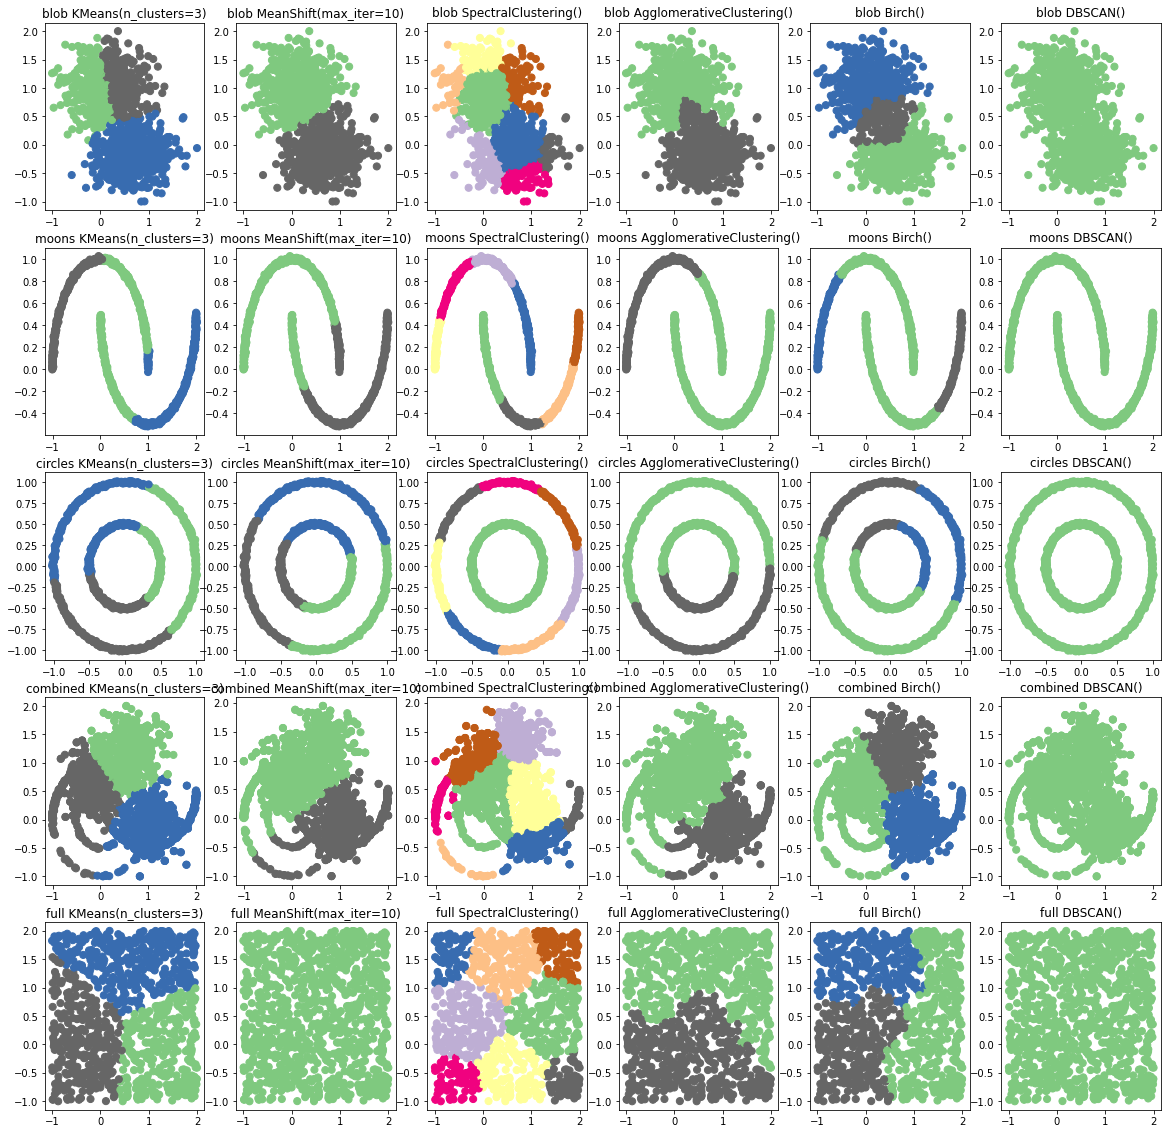

In [3]:
from sklearn.cluster import KMeans, MeanShift, SpectralClustering,  AgglomerativeClustering, Birch, DBSCAN
models = [KMeans(), MeanShift(), SpectralClustering(),  AgglomerativeClustering(), Birch()]
datasets = ['blob', 'moons', 'circles', 'combined', 'full']

models = [KMeans(n_clusters=3), MeanShift(max_iter=10), SpectralClustering(),  AgglomerativeClustering(), Birch(), DBSCAN()]
datasets = ['blob', 'moons','circles', 'combined', 'full']

plt.figure(figsize=(20,20))
i=0
for d in datasets:
    for m in models:
        i+=1
        plt.subplot(len(datasets), len(models), i)
        plt.title("{} {}".format(d, m))
        experiment(d, m)


# 3.

(2, 396.8816243335624, 0.354467588279949)
(3, 240.3391649993146, 0.3902518540786458)
(4, 168.93148358217402, 0.38075096645346995)
(5, 132.66180665976245, 0.36086578117383267)
(6, 111.90419784674204, 0.3391309283649344)
(7, 101.01579601070762, 0.3363430258016874)
(8, 88.432281535604, 0.35878239923557614)
(9, 77.64356628059222, 0.402997446814201)


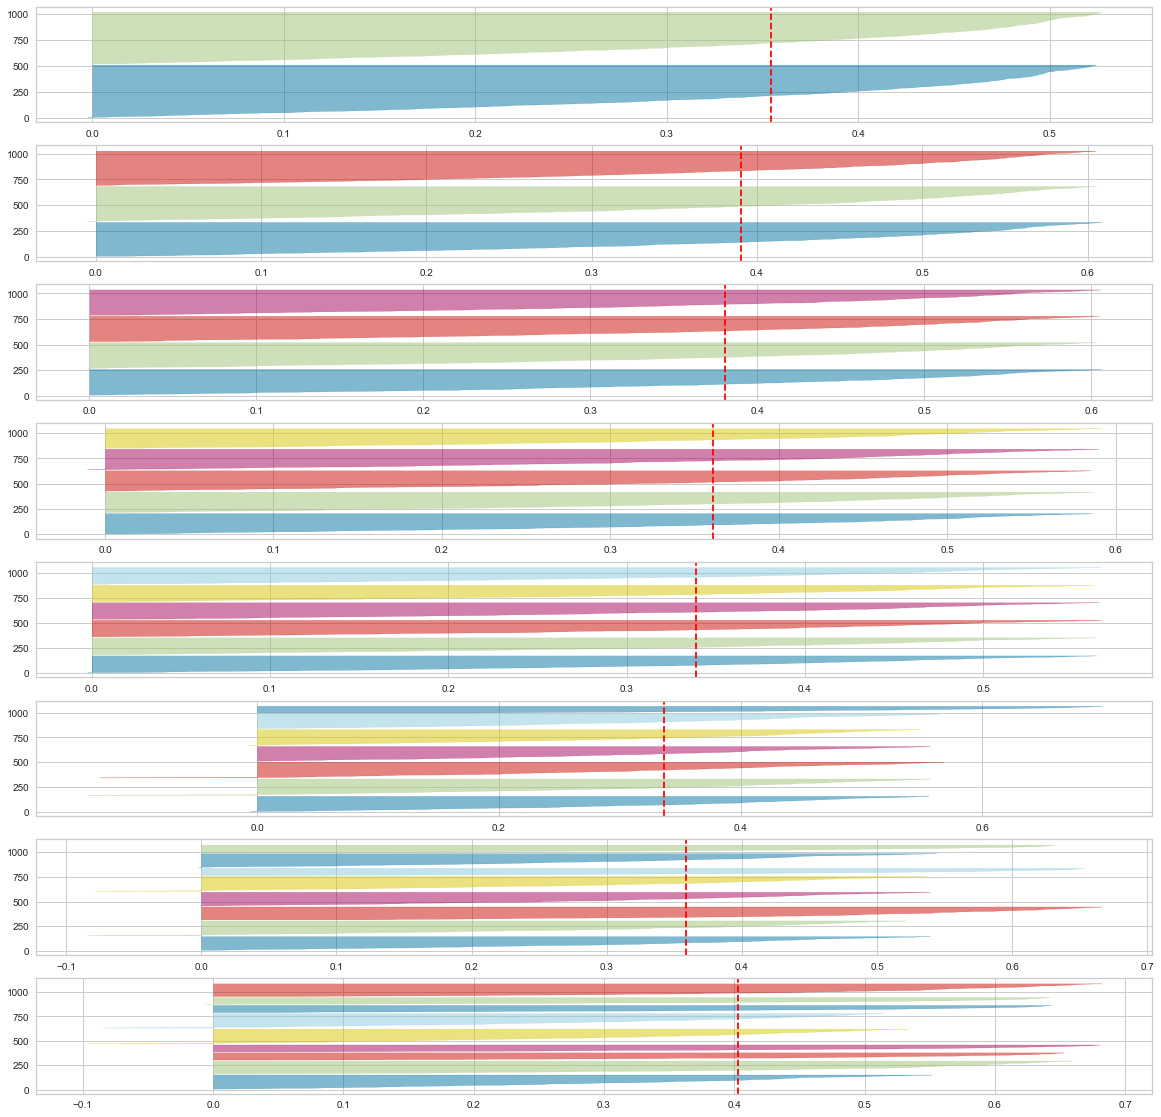

In [4]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans, MeanShift, SpectralClustering,  AgglomerativeClustering, Birch


plt.figure(figsize=(20,20))
results = []
i=0
k_tries = range(2, 10)
for k in k_tries:
    i+=1
    plt.subplot(len(k_tries),1, i)
    model = KMeans(n_clusters=k)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    X, y = get_toy_data('circles')
    visualizer.fit(X)        # Fit the data to the visualizer
    results.append((k, model.inertia_, visualizer.silhouette_score_))
    print(results[-1])

    

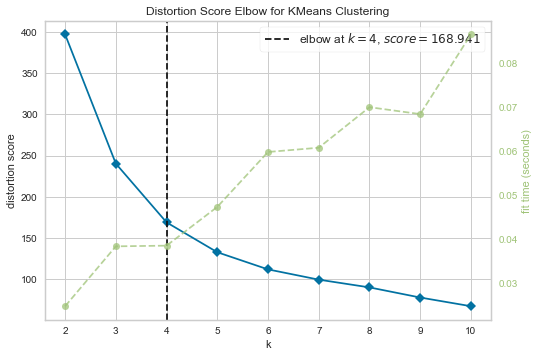

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [5]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
#visualizer = KElbowVisualizer(model, k=(5, 10, 15, 20, 25, 30, 35, 40, 45, 50))
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(X)  # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


### B. Fashion MNIST (30%)

En aquest apartat, farem servir una bases de dades de imatges, per a fer-hi un clustering. Esta anotada manualment per a fer una classificació, pero no utilitzarem aquesta informació per clusteritzar o trobar-ne el número de clusters desitjats. Us deixo un parell de funcions per mostrar gràficament els clusters obtinguts.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_mnist_clusters(clusters, cmap='binary'):
    
    n_clusters = clusters.shape[0]
    
    nx = int(np.ceil(np.sqrt(n_clusters)))
    ny = int(np.ceil(n_clusters / nx))

    plt.figure(figsize=(20,10))
    
    for i in range(n_clusters):
        plt.subplot(nx,ny,i+1)
        plt.imshow(clusters[i,:].reshape(28,28), cmap=cmap)
        plt.axis('off')
    
    plt.show()
    
import seaborn as sns

def mostrar_tsne(X_embedded, true_labels, cluster_labels):
    plt.figure(figsize=(20, 10))
    plt.subplot(121)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=true_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('viridis', n_colors=len(np.unique(true_labels))))
    plt.title("True Label")

    plt.subplot(122)
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=cluster_labels,
                    legend=False, alpha=0.5,
                    palette=sns.color_palette('magma', n_colors=len(np.unique(cluster_labels))))
    plt.title("Clusters")
    
def reordena_clusters_segons_y(y, cluster_centers_, cluster_labels):

    n_clusters = cluster_centers_.shape[0]
    cluster_to_y = []
    for i in range(n_clusters):
        cluster_to_y.append(np.argmax(np.bincount(y[cluster_labels == i])))

    idx_clusters = np.argsort(cluster_to_y)
    reordered_cluster_centers = cluster_centers_[idx_clusters]

    reordered_labels = np.zeros_like(cluster_labels)
    for i in range(n_clusters):
        reordered_labels[cluster_labels==idx_clusters[i]] = i

    return reordered_cluster_centers, reordered_labels


#### Preguntes

1. Un cop carregades les dades del fashion-mnist-train, feu un sampling de les dades si us triga massa (agafeu unes 1000 mostres).

2. Feu una clusterització de les dades. A través del mètode [**Elbow**](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html) busqueu la millor K en el K-Means.

3. Executa k-Means amb el millor k trobat. Fes-ho amb les dades samplejades i sense samplejar.

4. Mostra els centres del k-Means trobats. Què representen? Quina diferencia hi trobes amb les dades samplejades i sense samplejar?

5. Aplica una transformació [`TSNE`](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) sobre el conjunt de dades i visualitza els labels en aquest espai de poques dimensions.


#### Respostes

# 1

In [5]:
import pandas as pd
from sklearn.cluster import KMeans

# dataset = pd.read_csv('hand_sign_mnist_test.csv')
dataset = pd.read_csv('fashion-mnist_train.csv')

y_train = dataset["label"]
X_train = dataset.drop("label", axis="columns")

X_train_sampled = X_train[:1000]
y_train_sampled = y_train[:1000]

n_clusters = 25


FileNotFoundError: [Errno 2] No such file or directory: 'fashion-mnist_train.csv'

# 2

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(5, 10, 15, 20, 25, 30, 35, 40, 45, 50))

visualizer.fit(X_train_sampled)  # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(5, 10, 15, 20, 25, 30, 35, 40, 45, 50))

visualizer.fit(X_train_sampled)  # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

# 3.

In [10]:
kmeans_sampled = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train_sampled)

In [11]:
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X_train)


# 4.

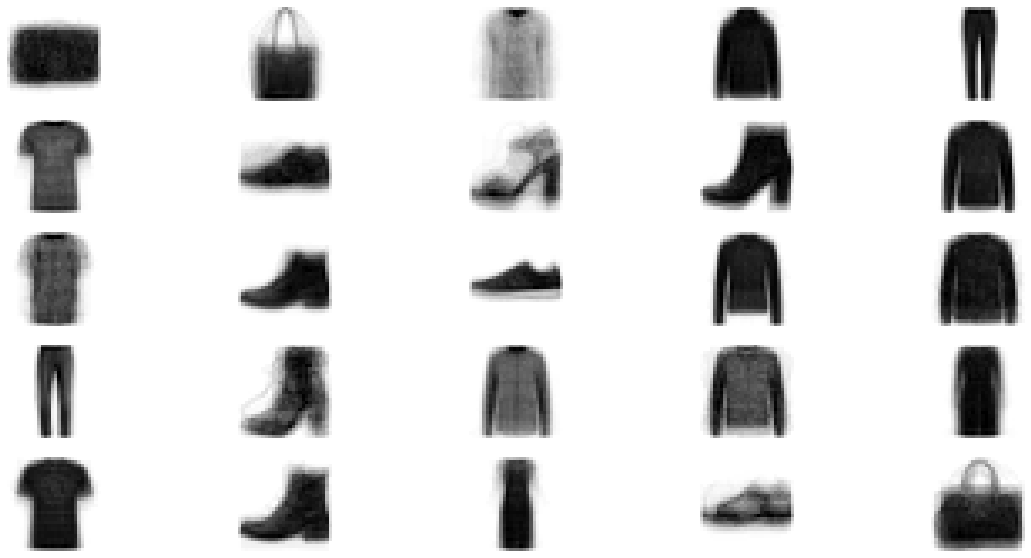

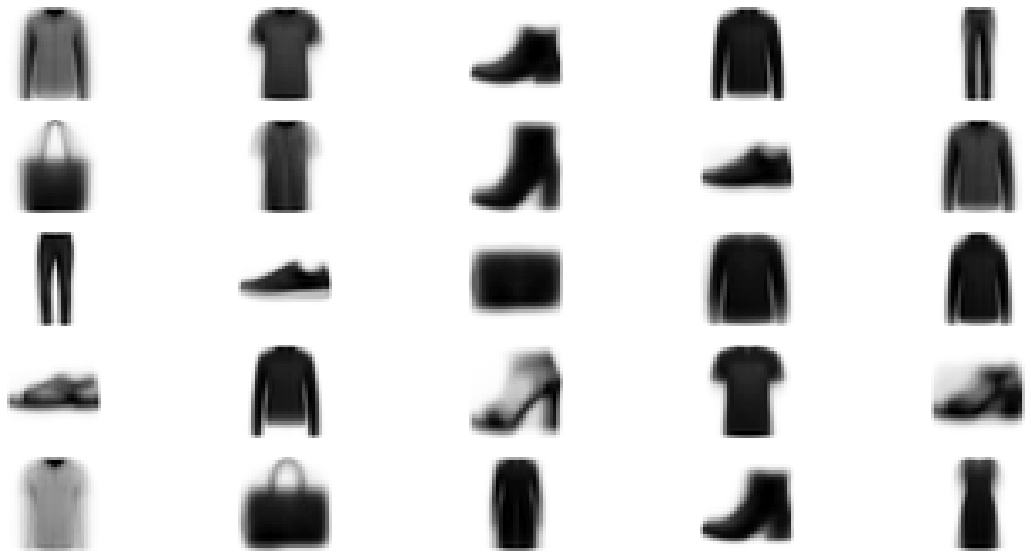

In [12]:
visualize_mnist_clusters(kmeans_sampled.cluster_centers_)
visualize_mnist_clusters(kmeans.cluster_centers_)

Només per temes de visualització, farem servir els labels reals per capgirar el ordre de les etiquetes. Podeu comprobar que si no executeu la següent cel·la, us sortiràn desordenats.

In [13]:
reordered_cluster_centers_sampled, reordered_labels_sampled = reordena_clusters_segons_y(y_train_sampled, 
                                                                                         kmeans_sampled.cluster_centers_, 
                                                                                         kmeans_sampled.labels_)

reordered_cluster_centers, reordered_labels = reordena_clusters_segons_y(y_train, 
                                                                         kmeans.cluster_centers_, 
                                                                         kmeans.labels_)

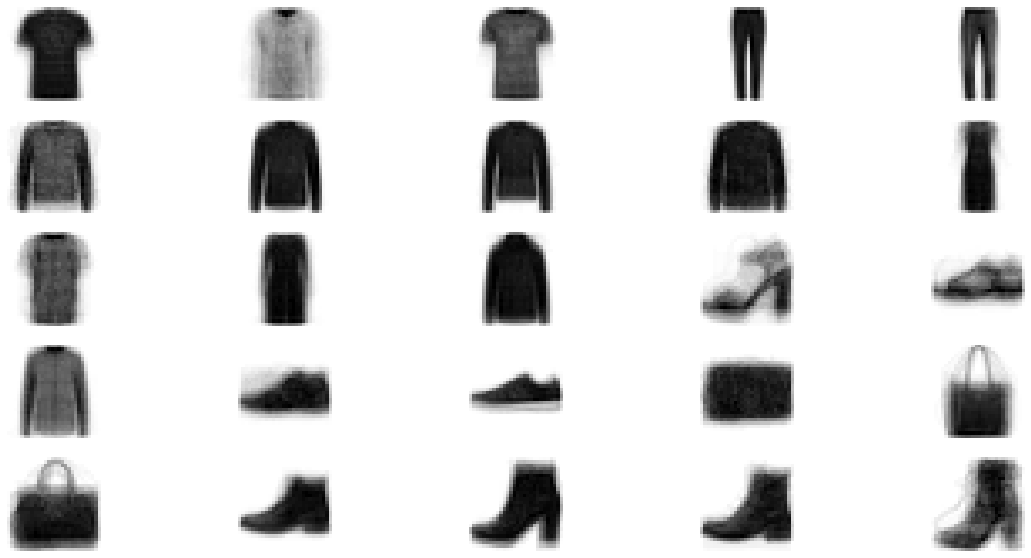

In [14]:
visualize_mnist_clusters(reordered_cluster_centers_sampled)

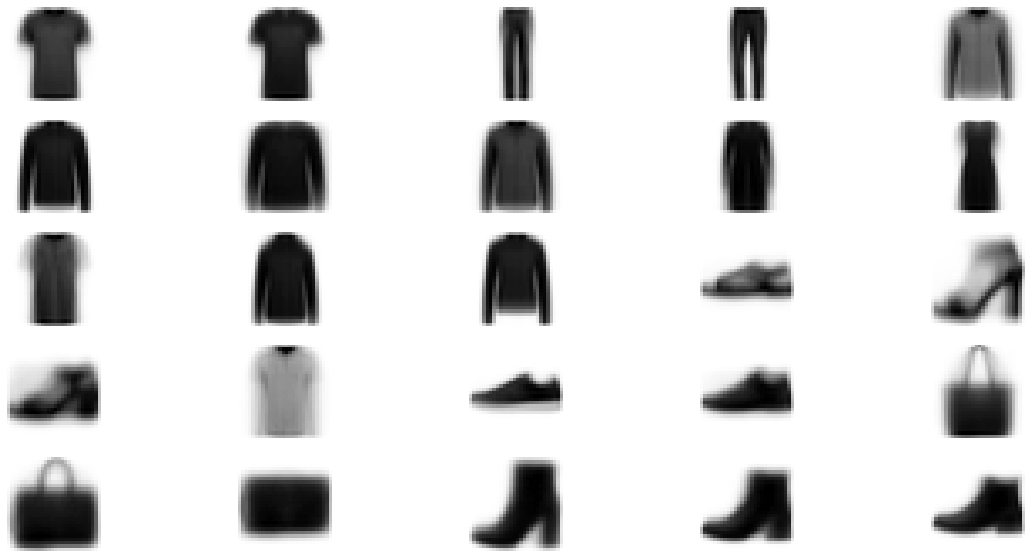

In [15]:
visualize_mnist_clusters(reordered_cluster_centers)

# 5.

In [16]:
from sklearn.manifold import TSNE

#X_embedded = TSNE(n_components=2).fit_transform(X_train)

X_embedded_sampled = TSNE(n_components=2).fit_transform(X_train_sampled)



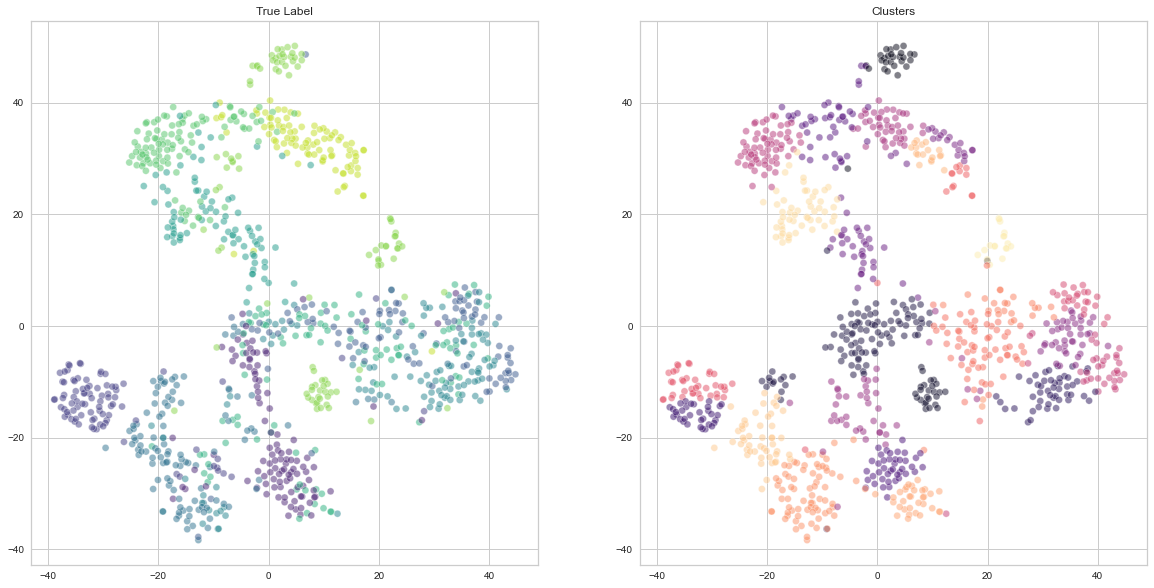

In [17]:
mostrar_tsne(X_embedded_sampled, y_train_sampled, kmeans_sampled.labels_)


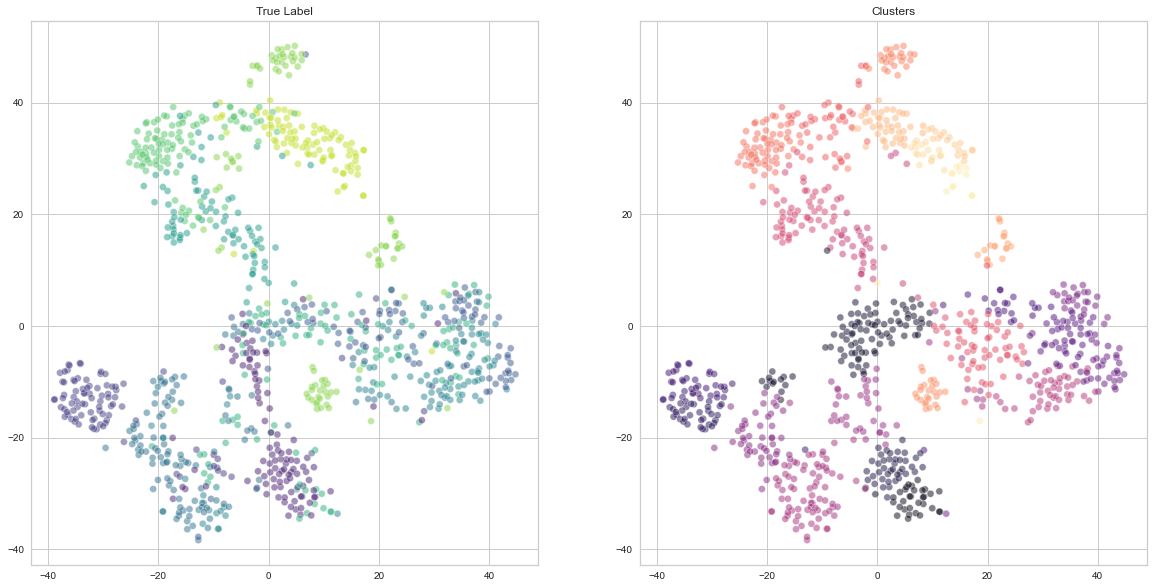

In [18]:
mostrar_tsne(X_embedded_sampled, y_train_sampled, reordered_labels_sampled)

### C. Color Quantization Image (30%)

### Preguntes

1. Escull 2 imatges, propies o de internet, mostreu-les i visualitzeu els colors en una gràfica 3d. A continuació veureu un exemple del que volem (a i b):

<table>
<tr>
    <td>
        <img src="https://miro.medium.com/max/1400/1*je8F8y5Vr9Mg44WEAG0YCg.jpeg" width="300">
    </td>
    <td>
        <img src="https://miro.medium.com/max/2892/1*94LY1FnsLN4L33dho9ol-A.png" style="width: 300px; height:200px;">
    </td>
    <td>
        <img src="https://miro.medium.com/max/1400/1*TIhj90vgn0lzgv6MsT7HNw.png" style="width: 300px; height:200px;">
    </td>
    
</tr>
<tr>
    <td style="text-align:center">
        (a) imatge original
    </td>
    <td style="text-align:center">
        (b) representació de tots els colors de la imatge
    </td>
    <td style="text-align:center">
        (c) quantització dels colors
    </td>
    
</tr>
</table>

2. Realitzeu el clustering de colors, per tal de coneixer aquells "colors" més representatius de la imatge. Podeu aplicar un **k-Means** amb 16 clusters. Mostreu la representació dels colors quantitzats (com la c). Podeu agilitzar el procés fent un sampling del total de pixel de la imatge.

3. Mostreu la comparativa de la imatge original i la imatge representada només amb els 16 colors. [Aqui trobareu un exemple similar](https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html). Un exemple amb diferents seleccions de k:
    <img src="https://miro.medium.com/max/1400/1*7ioAN_1cNsDRC76HGBZEyQ.png" width="100%">

4. Realitzeu el clustering de colors aplicant **GMM**. Mostreu la distribució de colors ara amb els clusters de GMM. Quines diferencies hi veieu respecte als clusters obtinguts amb k-Means?

5. Mostra les imatges resultants (original, kmeans i gmm)

In [6]:
import time
import numpy as np
import skimage.io
from sklearn.utils import shuffle
from skimage.transform import downscale_local_mean

    
def llegir_imatge(image_name):
    img = skimage.io.imread(image_name)
    # Convert to floats instead of the default 8 bits integer coding. Dividing by
    # 255 is important so that plt.imshow behaves works well on float data (need to
    # be in the range [0-1])
    img = np.array(img, dtype=np.float64) / 255
    print(img.shape)
    return img

def mostra_imatge(img):
    plt.axis('off')
    plt.imshow(img)
    
def mostra_distribucio_colors(img, pixel_colors=None):
    real_pixel_colors = img.reshape(-1,3)
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(121, projection='3d')
    ax.scatter(img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten(), facecolors=real_pixel_colors, marker="o")
    ax.set_xlabel("Red")
    ax.set_ylabel("Green")
    ax.set_zlabel("Blue")
    ax.set_title('All Distinct Colors ({} colors)'.format(len(np.unique(real_pixel_colors))))
    
    if pixel_colors is not None:
        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(img[:,:,0].flatten(), img[:,:,1].flatten(), img[:,:,2].flatten(), facecolors=pixel_colors, marker="o")
        ax.set_xlabel("Red")
        ax.set_ylabel("Green")
        ax.set_zlabel("Blue")
        ax.set_title('Clustered Distinct Colors ({} colors)'.format(len(np.unique(pixel_colors))))

    plt.show()
    
def samplejar_colors_imatge(img):
    image_array = img.reshape(-1, 3)
    image_array_sample = shuffle(image_array, random_state=0)[:10000]
    return image_array, image_array_sample

def recrear_colors(codebook, labels):
    colors_array = np.zeros((len(labels), 3))
    for i in range(len(labels)):
        colors_array[i, :] = codebook[labels[i],:]
    return colors_array
    
    
def recrear_image(codebook, labels, shape):
    d = codebook.shape[1]
    image = np.zeros(shape)
    label_idx = 0
    for i in range(shape[0]):
        for j in range(shape[1]):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image


In [7]:
img = llegir_imatge("photo3.jpg") # photo2...

(1000, 1000, 3)


In [8]:
n_colors = 16

In [9]:
print("Fitting model on a small sub-sample of the data")
t0 = time.time()
image_array, image_array_sample = samplejar_colors_imatge(img)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels_all_kmeans = kmeans.predict(img.reshape(-1, 3))
print("done in %0.3fs." % (time.time() - t0))

Fitting model on a small sub-sample of the data
done in 1.387s.


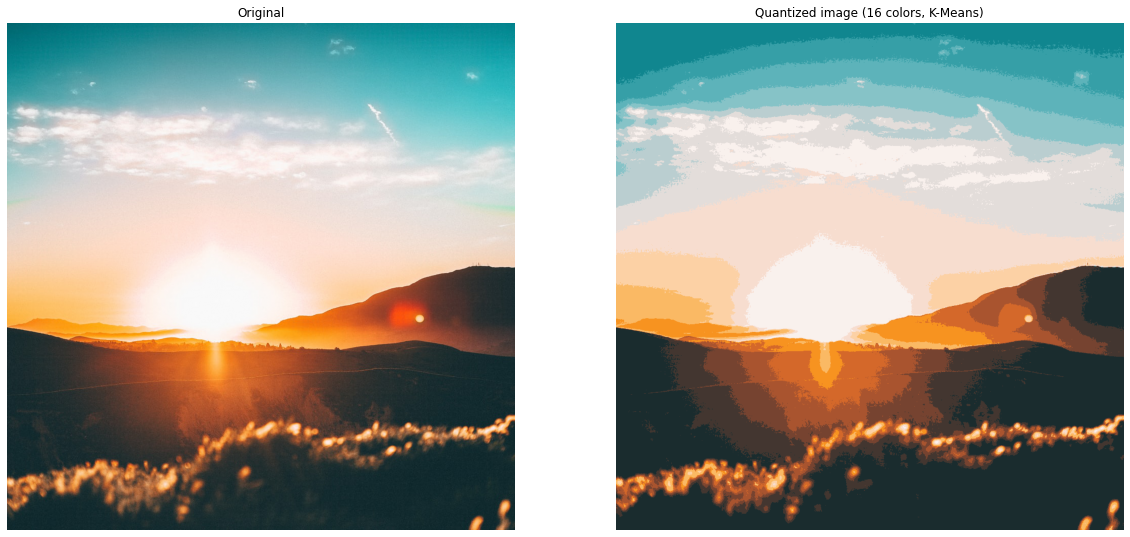

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.title('Original')
plt.imshow(img)
plt.subplot(122)
plt.axis('off')
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.imshow(recrear_image(kmeans.cluster_centers_, labels_all_kmeans, img.shape))

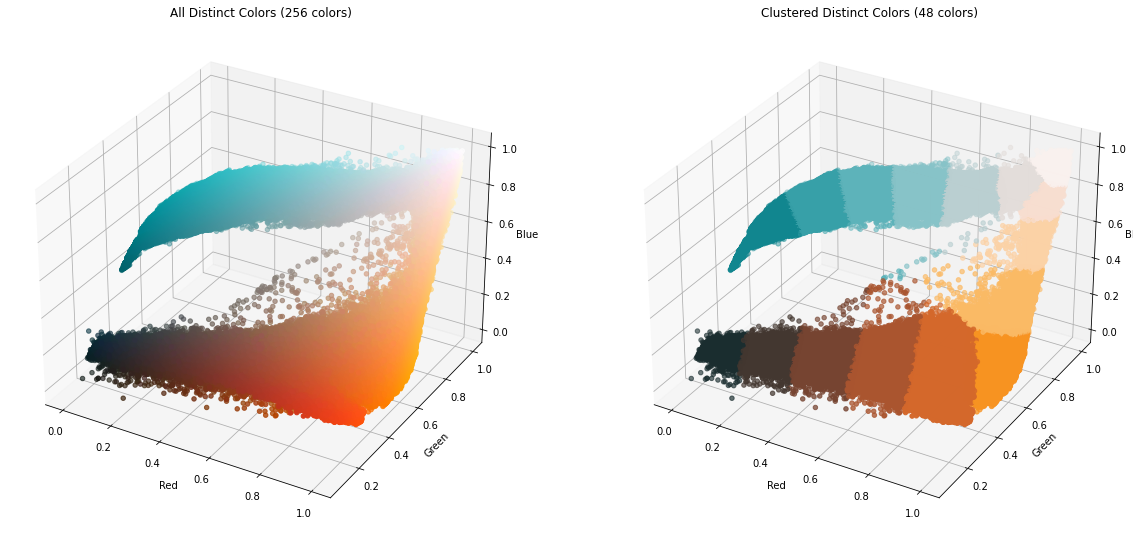

In [11]:
mostra_distribucio_colors(img, recrear_colors(kmeans.cluster_centers_, labels_all_kmeans))

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=n_colors, covariance_type='full').fit(image_array_sample)

labels_all_gmm = gmm.predict(image_array)

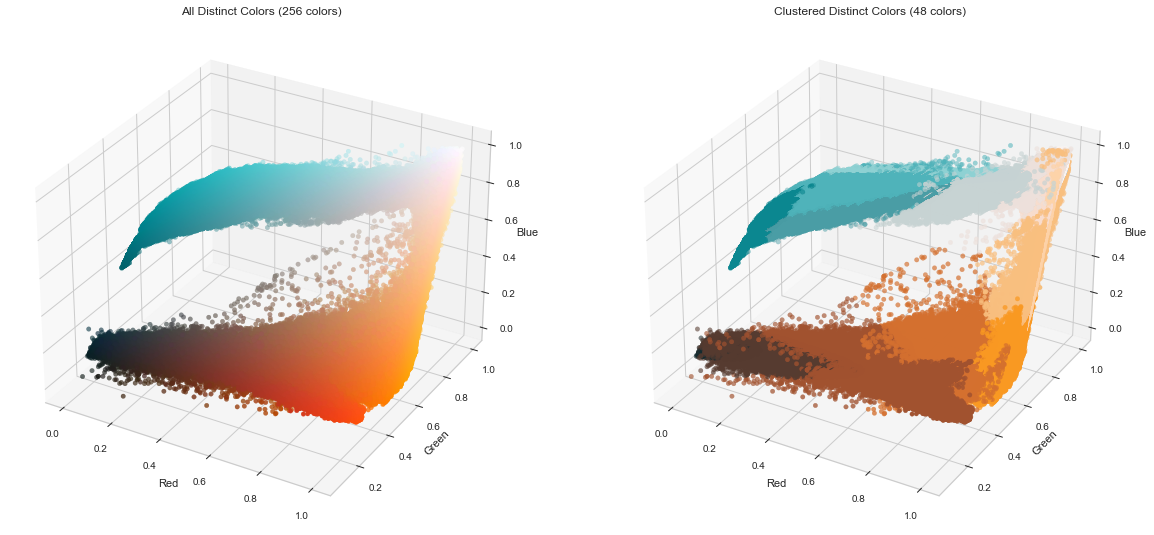

In [26]:
mostra_distribucio_colors(img, recrear_colors(gmm.means_, labels_all_gmm))

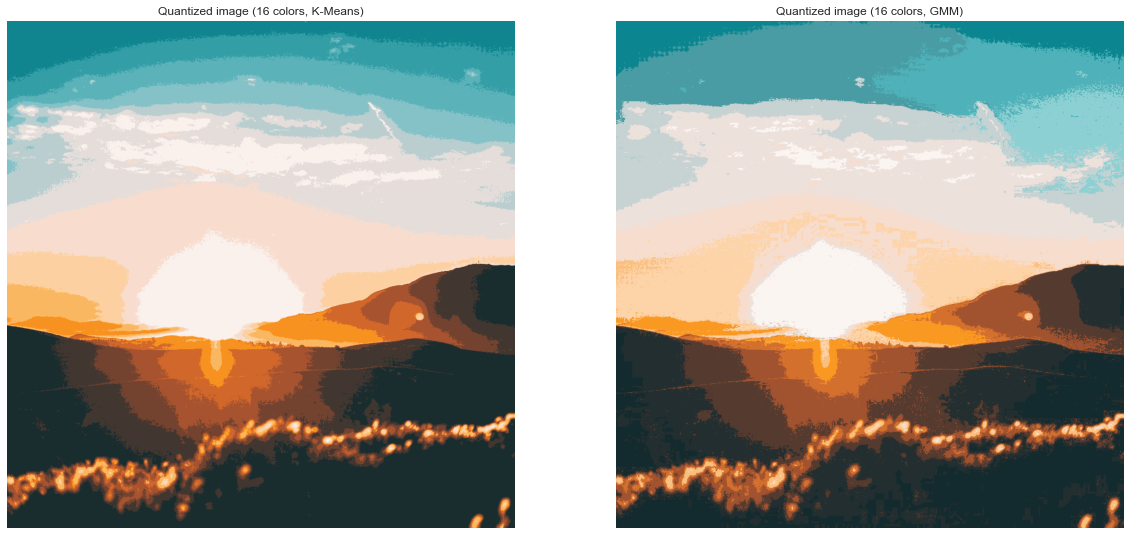

In [27]:
plt.figure(figsize=(20,10))
plt.subplot(121)
plt.axis('off')
plt.title('Quantized image ({} colors, K-Means)'.format(n_colors))
plt.imshow(recrear_image(kmeans.cluster_centers_, labels_all_kmeans, img.shape))

plt.subplot(122)
plt.axis('off')
plt.title('Quantized image ({} colors, GMM)'.format(n_colors))
plt.imshow(recrear_image(gmm.means_, labels_all_gmm, img.shape))
